In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, ifft

# Prepare a signal containing two frequencies.

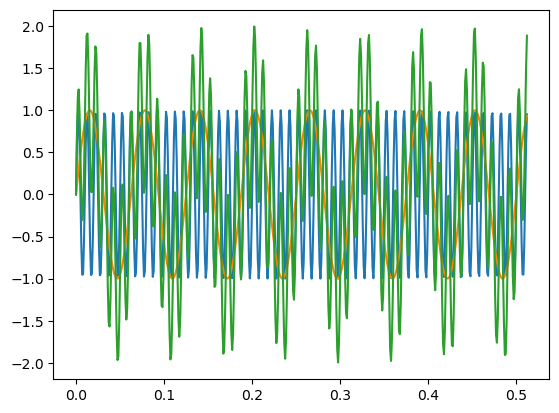

In [2]:
N = 512                     # Number of samples
Fs = 1000                   # Sampling frequency
Vrms = 0.7071               # Vrms
Vmax = np.sqrt(2.)*Vrms     # Conversion to amplitude

time = np.linspace(0, N/Fs, N)  # Generate 1024 time labels between 0 and 1 second.

frequency1 = 100 # Hz
frequency2 = 16  # Hz

signal_f1 = Vmax * np.sin(2*np.pi*frequency1*time)
signal_f2 = Vmax*np.sin(2*np.pi*frequency2*time)
our_signal = signal_f1 + signal_f2       # Generate 1024 samples of the sinusoidal signal.

plt.plot(time, signal_f1)       # Plot the signal (Note: the frequency 16Hz)
plt.plot(time, signal_f2)       # Plot the signal (Note: the frequency 16Hz)
plt.plot(time, our_signal)       # Plot the signal (Note: the frequency 16Hz)

# Perform an FFT of the signal.

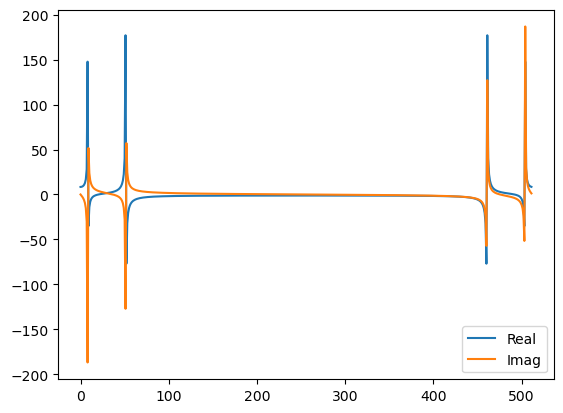

In [3]:
fft_data = fft(our_signal,n=N)

plt.plot(fft_data.real, label='Real')
plt.plot(fft_data.imag, label='Imag')
plt.legend()

# Perform an inverse FFT of the transformed signal and compare to the original data.

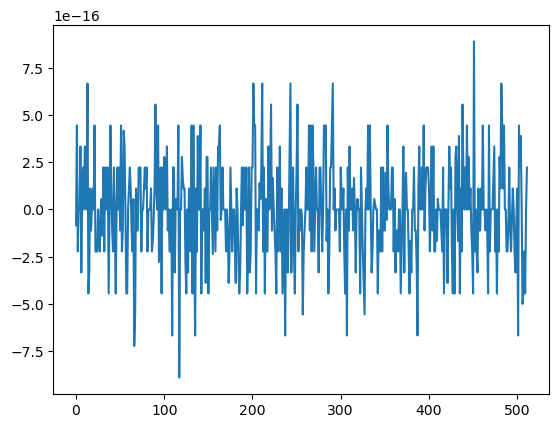

In [4]:
ifft_data = ifft(fft_data, n=N)

plt.plot(ifft_data.real-our_signal)

N.B. Small deviations from zero are the numerical errors.

# Optimized naive filter test

In [15]:
def sigm(x, slope=1.):
    return 1./(1. + np.exp(-x*slope))

In [16]:
offset = 208/int(N/2.)
print(offset)
filt = sigm(np.linspace(-10,10,num=int(N/2.)) - 10*offset, slope=4.)

0.8125


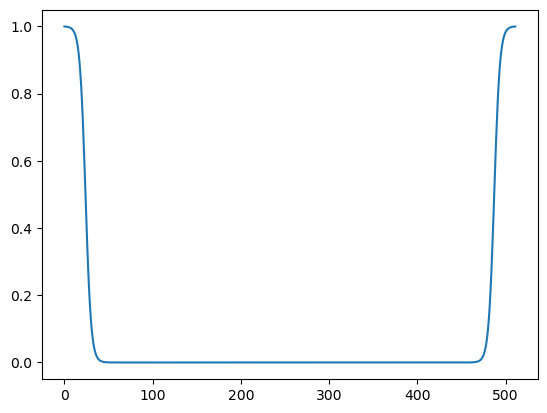

In [17]:
a = np.concatenate((filt[::-1], filt))

plt.plot(a)

In [18]:
filtered_f = fft_data * a

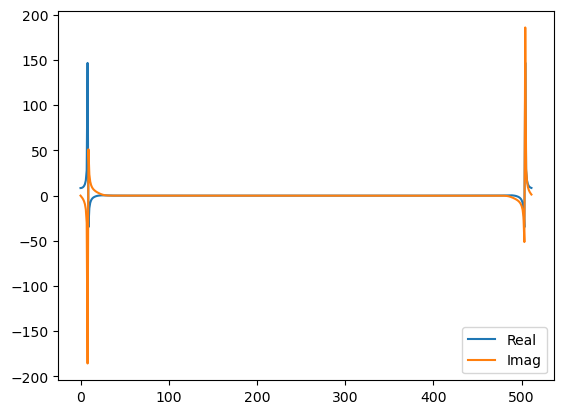

In [19]:
plt.plot(filtered_f.real, label='Real')
plt.plot(filtered_f.imag, label='Imag')
plt.legend()

In [20]:
filtered_t = ifft(filtered_f, n=N)

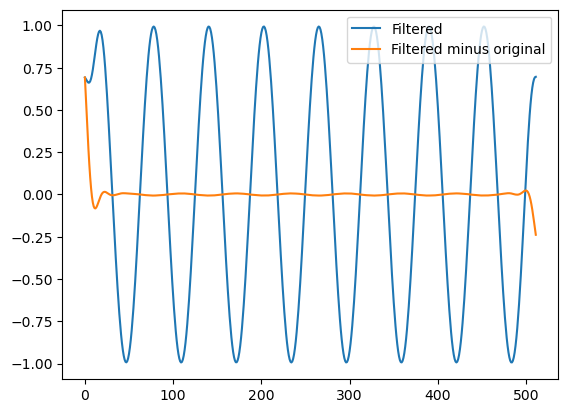

In [21]:
plt.plot(filtered_t.real, label='Filtered')
plt.plot(filtered_t.real-signal_f2, label='Filtered minus original')
plt.legend()